<PIL.Image.Image image mode=L size=40x40 at 0x7F8485CD9860>


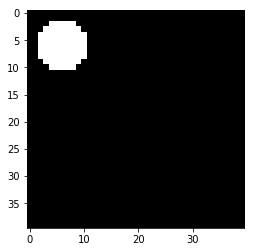

In [16]:
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
from torchvision import transforms

image = Image.new('L', (40, 40))
draw = ImageDraw.Draw(image)
draw.ellipse((2, 2, 10, 10), fill = 'white', outline ='white')

print(image)
n_image = transforms.ToTensor()(image).cpu().data.numpy()
plt.imshow(n_image[0], cmap='gray')

In [17]:
def generate_circle_image(x, y, image_size=(40, 40), circle_radius=4):
    assert x >= 0
    assert x <= 1
    assert y >= 0
    assert y <= 1
    
    x_pixel = (image_size[0] - 2 * circle_radius - 1) * x + circle_radius
    y_pixel = (image_size[1] - 2 * circle_radius - 1) * y + circle_radius
    
    image = Image.new('L', image_size)
    draw = ImageDraw.Draw(image)
    upper_left = (x_pixel - circle_radius, y_pixel - circle_radius)
    lower_right = (x_pixel + circle_radius, y_pixel + circle_radius)
    draw.ellipse((*upper_left, *lower_right), fill='white', outline='white')
    
    return image

In [18]:
from ipywidgets import interact, Layout
import ipywidgets as widgets

def display_circle_image(x, y):
    image = generate_circle_image(x, y, image_size=(30,30), circle_radius=5)
    n_image = transforms.ToTensor()(image).cpu().data.numpy()
    plt.imshow(n_image[0], cmap='gray')
    
# show some interactive widgets that let us play around with different values.
interact(display_circle_image,
         x=(0.0, 1.0, 1/20),
         y=(0.0, 1.0, 1/20));


interactive(children=(FloatSlider(value=0.5, description='x', max=1.0, step=0.05), FloatSlider(value=0.5, desc…

In [19]:
from sconce.datasets.simple_dots import SimpleDots

In [20]:
ds = SimpleDots()

In [21]:
ds

SimpleDots Dataset
    Size of images: (30, 30)
    Radius of circle: 4
    Number of images: 400

In [22]:
ds[340]

(tensor([[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
            0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
            1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
            0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
            1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
            0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
            1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
            0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
            1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
            0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
            1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
            0.

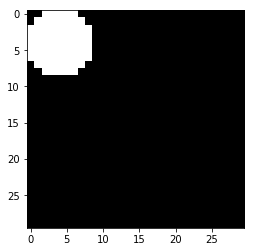

In [23]:
from matplotlib import pyplot as plt
plt.imshow(ds[0][0][0], cmap='gray')